### Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Load and Preprocess the Data

In [25]:
data = pd.read_excel("Online Retail.xlsx")

In [26]:
display(data.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
display(data.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


##### Drop Unnecessary Values

In [31]:
data = data.drop(columns=['InvoiceNo', 'CustomerID', 'InvoiceDate', 'Description', 'StockCode'], axis=1)

In [32]:
display(data.head())

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom


##### Handling Missing Values

In [33]:
data.isnull().sum()

Quantity     0
UnitPrice    0
Country      0
dtype: int64

##### Checking Duplicates

In [34]:
data.duplicated().sum()

526545

In [35]:
# Dropping Duplicates

data = data.drop_duplicates()

In [36]:
#Checking Again
data.duplicated().sum()

0

### Label Encoder

In [37]:
le = LabelEncoder()

In [38]:
data['Country'] = le.fit_transform(data['Country'])

In [39]:
data.head()

,Quantity,UnitPrice,Country
0,6,2.55,36
1,6,3.39,36
2,8,2.75,36
5,2,7.65,36
6,6,4.25,36


### Standard Scaler

In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [41]:
data_scaled

array([[-0.02614213, -0.08331171,  0.76671218],
       [-0.02614213, -0.08178719,  0.76671218],
       [-0.02458434, -0.08294873,  0.76671218],
       ...,
       [ 0.08134527, -0.08202313,  0.76671218],
       [ 0.03461162, -0.08650594,  0.76671218],
       [-0.02614213, -0.06625161, -1.11490294]])

### Apply K-Means for Various K-Values

In [42]:
inertia_values = []
silhouette_scores = []
k_range = range(2,11)

for K in k_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)

    # Inertia
    inertia_values.append(kmeans.inertia_)

    # SIlhoutte Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)


### Elbow Method

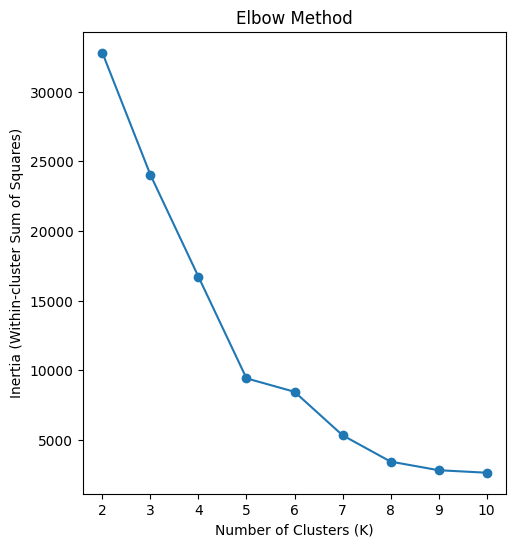

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

### Silhoutte Score

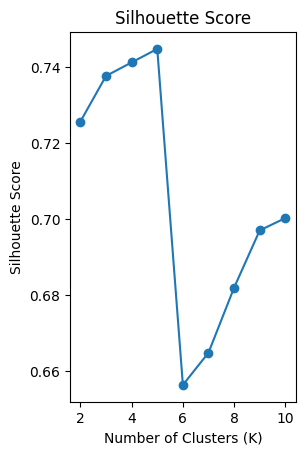

In [46]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [47]:
print(f"Silhouette score: {silhouette:.2f}")

Silhouette score: 0.70
